<a href="https://colab.research.google.com/github/b-reszczynski/gminy-parki/blob/main/gminy_statystyka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [2]:
gminy_income = pd.read_csv("gminy_income.csv")
gminy_tourist = pd.read_csv("gminy_tourist.csv")

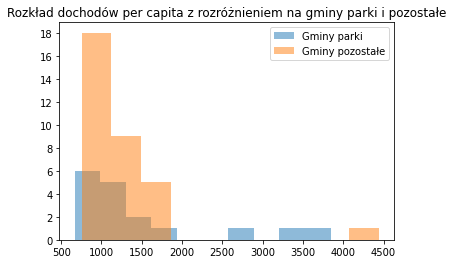

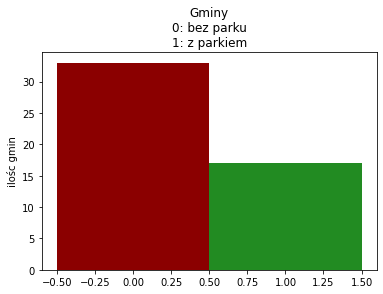

In [3]:
display(HTML('<h1>Gminy- dochód per capita</h1>'))

park_tourist = gminy_income[gminy_income["is_park"] == 1]["income"].values
no_park_tourist = gminy_income[gminy_income["is_park"] == 0]["income"].values
bins = 10
plt.hist(park_tourist, bins, alpha=0.5, label='Gminy parki')
plt.hist(no_park_tourist, bins, alpha=0.5, label='Gminy pozostałe')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 20, step=2))
plt.title("Rozkład dochodów per capita z rozróżnieniem na gminy parki i pozostałe")
plt.show()

counts, bins = np.histogram(gminy_income["is_park"]);
n,bin,bar = plt.hist(bins[:-1],  bins=[-.5,.5,1.5], weights=counts);
bar[0].set_fc("darkred")
bar[1].set_fc("forestgreen")
plt.title("Gminy\n0: bez parku\n1: z parkiem", fontdict=None, loc='center', pad=None)
plt.ylabel("ilośc gmin")
plt.show()

corr,p_val = stats.pointbiserialr(gminy_income["is_park"].values, gminy_income["income"].values)
display(HTML("<h1>" + "Korelacja: " + str(round(corr,3)) + "</h1>"))
display(HTML("<h1>" + "P-value: " + str(round(p_val,3)) + "</h1>"))

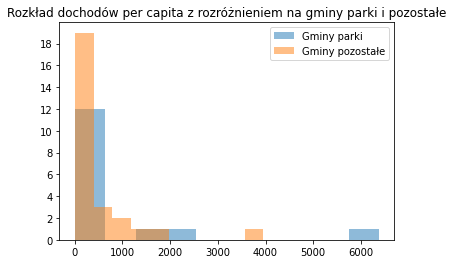

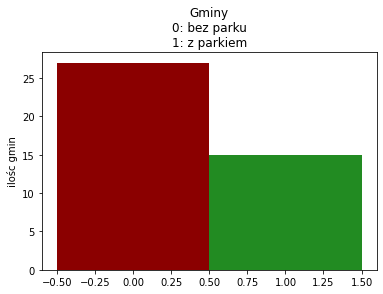

In [4]:
gminy_tourist = gminy_tourist[gminy_tourist.income_tourists <= 3*gminy_tourist.income_tourists.values.std()]

display(HTML('<h1>Gminy- dochód per capita z turystów zagranicznych</h1>'))
park_tourist = gminy_tourist[gminy_tourist["is_park"] == 1]["income_tourists"].values
no_park_tourist = gminy_tourist[gminy_tourist["is_park"] == 0]["income_tourists"].values
bins = 10
plt.hist(park_tourist, bins, alpha=0.5, label='Gminy parki')
plt.hist(no_park_tourist, bins, alpha=0.5, label='Gminy pozostałe')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 20, step=2))
plt.title("Rozkład dochodów per capita z rozróżnieniem na gminy parki i pozostałe")
plt.show()

counts, bins = np.histogram(gminy_tourist["is_park"]);
n,bin,bar = plt.hist(bins[:-1],  bins=[-.5,.5,1.5], weights=counts);
bar[0].set_fc("darkred")
bar[1].set_fc("forestgreen")
plt.title("Gminy\n0: bez parku\n1: z parkiem", fontdict=None, loc='center', pad=None)
plt.ylabel("ilośc gmin")
plt.show()


corr,p_val = stats.pointbiserialr(gminy_tourist["is_park"].values, gminy_tourist["income_tourists"].values)
display(HTML("<h1>" + "Korelacja: " + str(round(corr,3)) + "</h1>"))
display(HTML("<h1>" + "P-value: " + str(round(p_val,3)) + "</h1>"))